## Task 1: Dataset Analysis & Preparation

### 1.2 Loading the dataset

In [9]:
import gzip
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

with gzip.open('dataset/goemotions.json.gz', 'r') as file:
    fileData = file.read()
    dataset = json.loads(fileData.decode('utf-8'))

### 1.3 Extracting posts, emotions, and sentiments & plotting categories

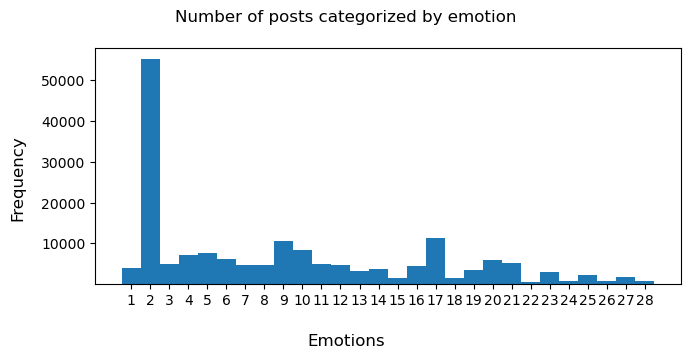

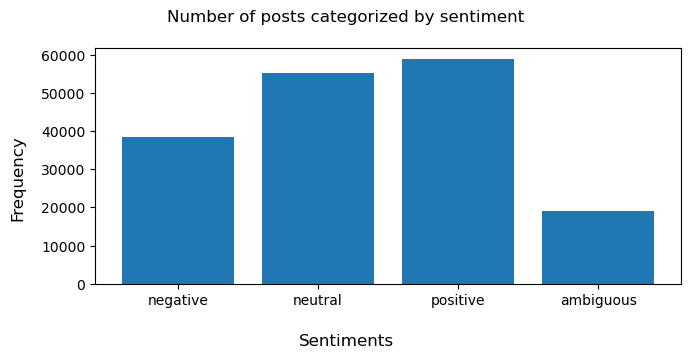

In [13]:
posts = []
emotions = []
sentiments = []

# Extracting posts, emotions, and sentiments into corresponding lists
for i in range(len(dataset)):
    posts.append(dataset[i][0])
    emotions.append(dataset[i][1])
    sentiments.append(dataset[i][2])

# Gathering emotions and sentiments data
emotions_data = {}
sentiments_data = {}
    
for i in range(len(dataset)):
    if dataset[i][1] in emotions_data.keys():
        emotions_data[dataset[i][1]] = emotions_data[dataset[i][1]]+1
    else:
        emotions_data[dataset[i][1]] = 1

for i in range(len(dataset)):
    if dataset[i][2] in sentiments_data.keys():
        sentiments_data[dataset[i][2]] = sentiments_data[dataset[i][2]]+1
    else:
        sentiments_data[dataset[i][2]] = 1      
        
# Mapping emotions_data keys to a numerical value for better view in graph
emotions_with_numerical_keys = {}

for i in emotions_data.keys():
    emotions_with_numerical_keys[str(list(emotions_data.keys()).index(i)+1)] = emotions_data[i]

# Plot dataset
emotion_labels = list(emotions_with_numerical_keys.keys())
emotion_frequency = list(emotions_data.values())
sentiment_labels = list(sentiments_data.keys())
sentiment_frequency = list(sentiments_data.values())

# Plotting the number of posts by emotions
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig1 = plt.figure()
plt.bar(emotion_labels, emotion_frequency, 1, 28)
fig1.supxlabel('Emotions')
fig1.supylabel('Frequency')
fig1.suptitle('Number of posts categorized by emotion')

# Plotting the number of posts by sentiments
fig2 = plt.figure()
plt.bar(sentiment_labels, sentiment_frequency)
fig2.supxlabel('Sentiments')
fig2.supylabel('Frequency')
fig2.suptitle('Number of posts categorized by sentiment')

# Outputting graphs in pdf
pp = PdfPages('pre-analysis_of_dataset.pdf')
fig_nums = plt.get_fignums()
figs = [plt.figure(n) for n in fig_nums]
for fig in figs:
    fig.savefig(pp, format='pdf')
pp.close()
